In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mesa_reader import MesaData

sb.set(style='whitegrid', context='talk', palette='Set1')
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 300

['nmdm_test_wOtherNeu.data', 'nmdm_modZ.data', 'nmdm_test_noNMDM.data']


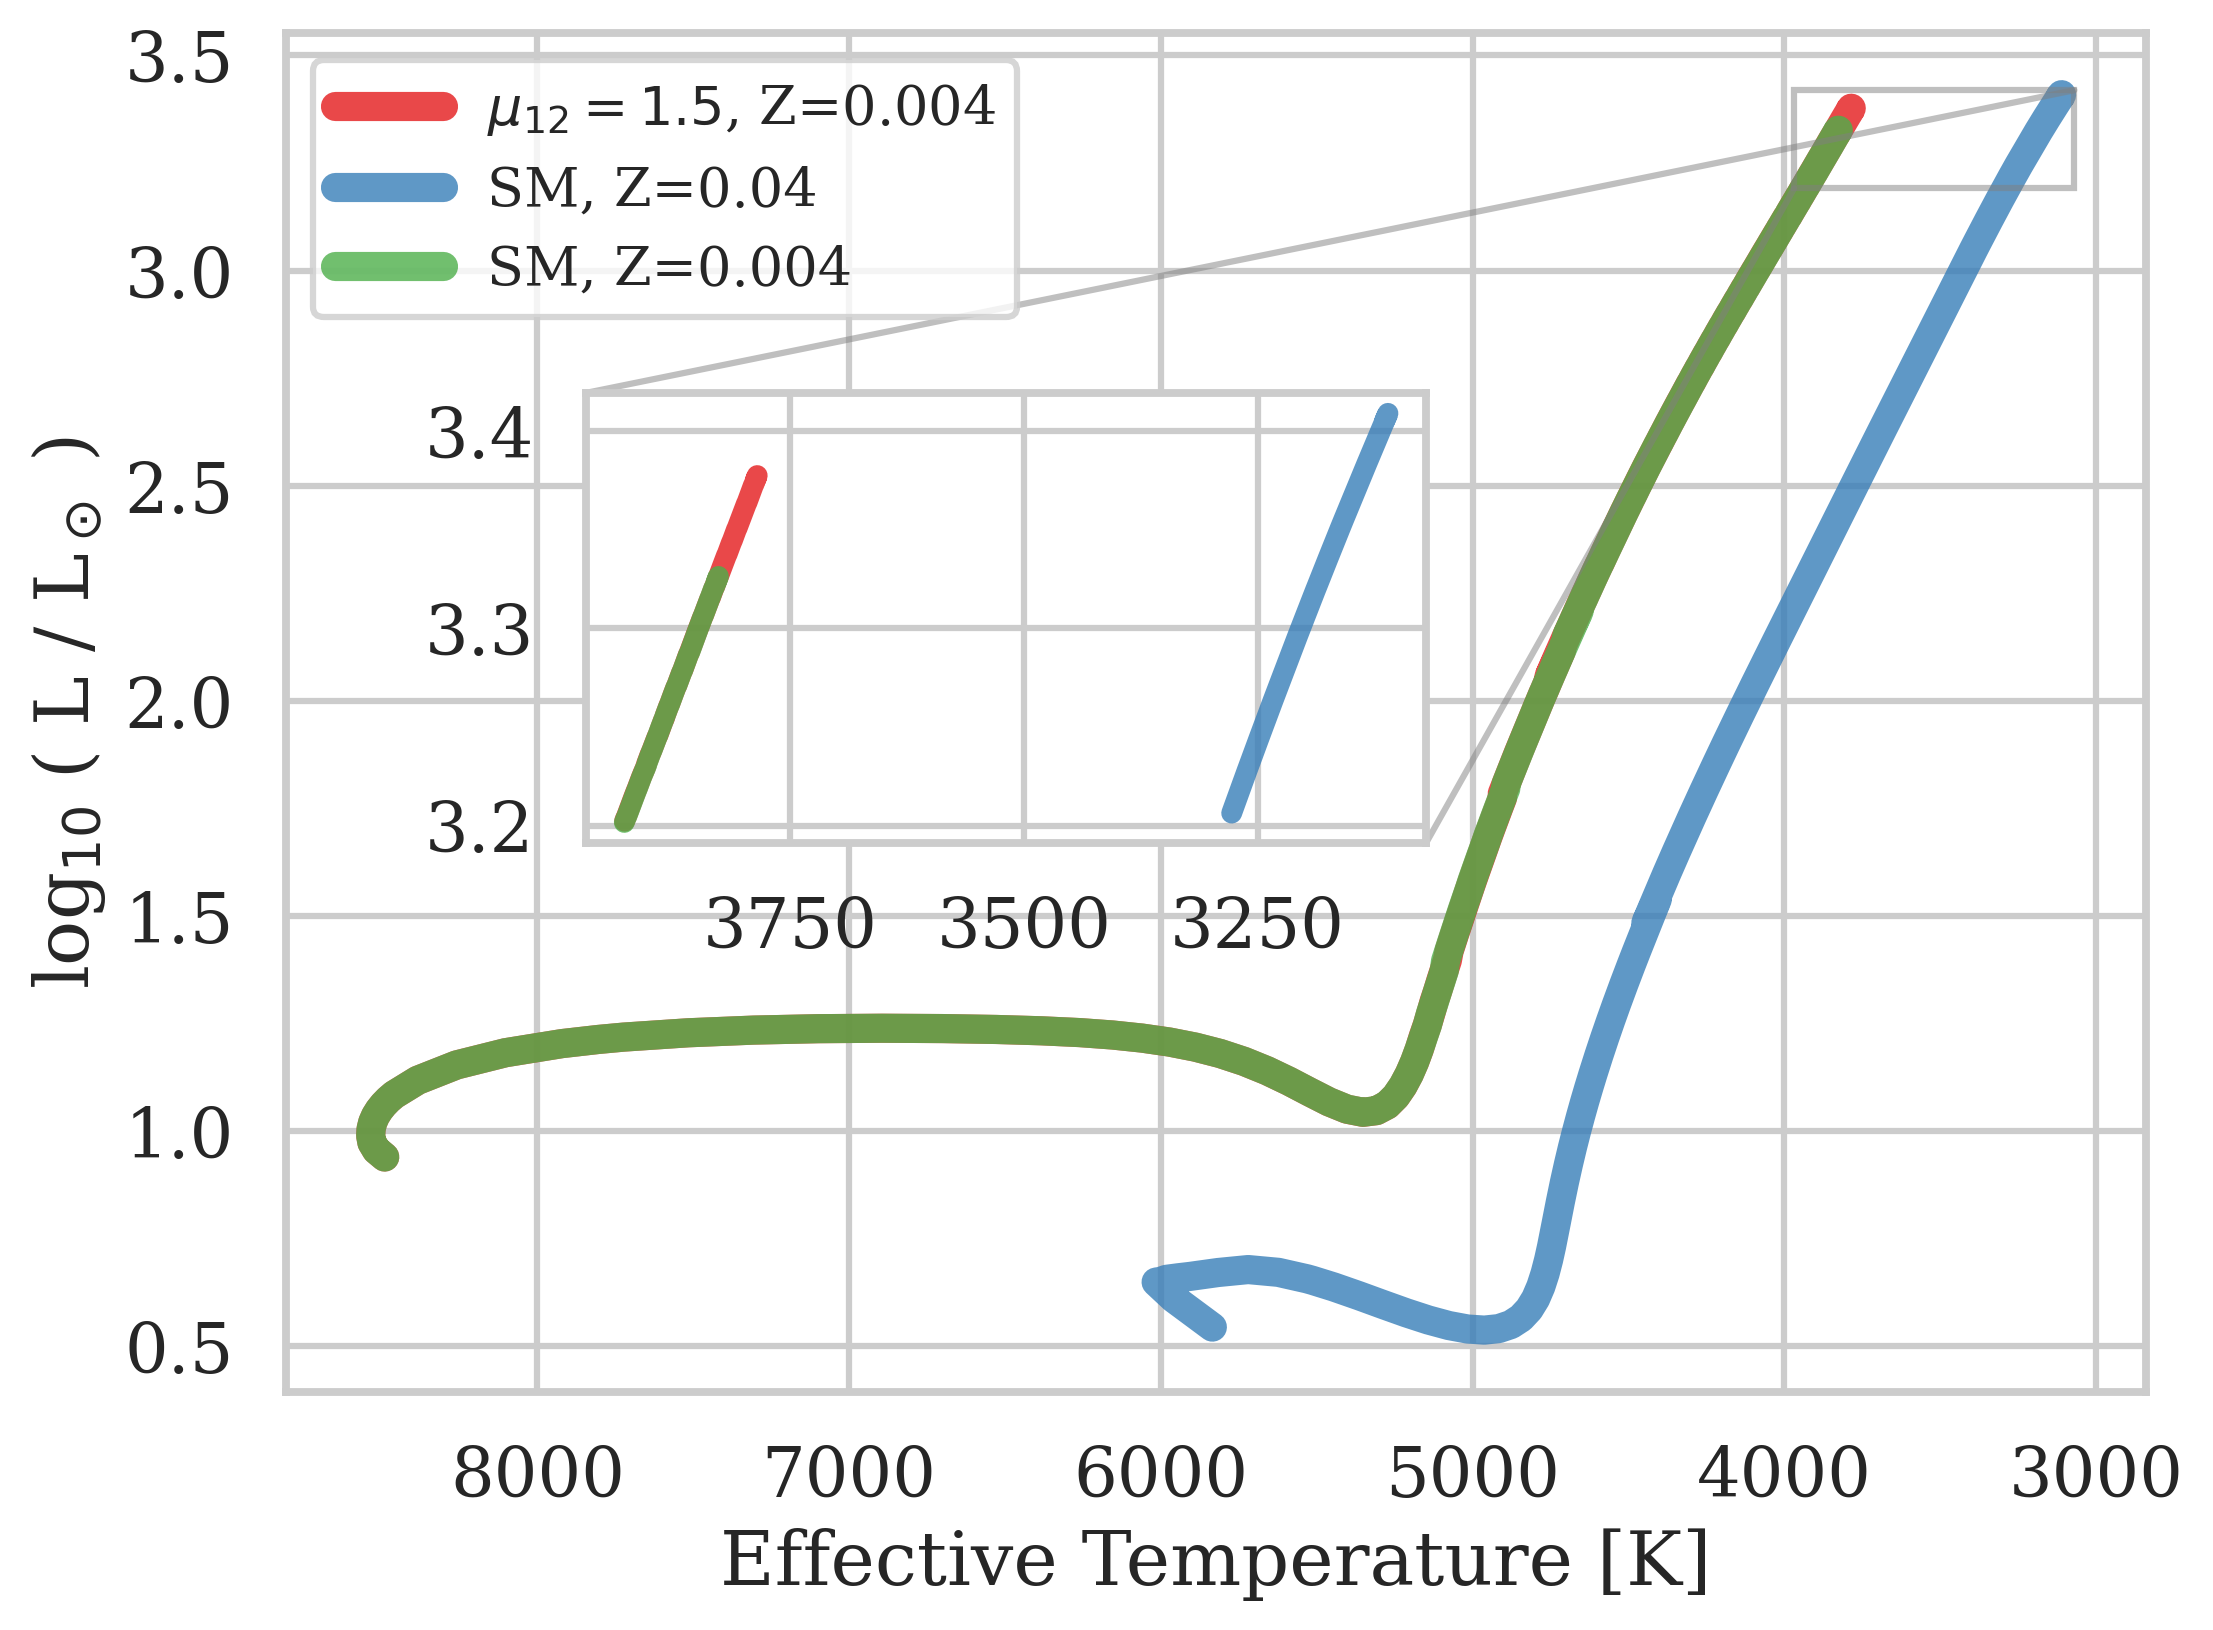

In [2]:
idxs = [98, 95, 98]
end = [298, 375, 200]

data = glob.glob('*.data')
print(data)
fig, ax = plt.subplots(figsize=(8,6))
ax2 = plt.axes([.25, .43, .35, .25])
labels = [r'$\mu_{12}=1.5$, Z=0.004', 'SM, Z=0.04', 'SM, Z=0.004']
for d, L, e, idx in zip(data, labels, end, idxs):
    m = MesaData(d)
    ax.plot(m.effective_T[idx:], m.log_L[idx:], label=L, alpha=0.8, lw=7)
    
    # Plot just the tip
    ax2.plot(m.effective_T[len(m.effective_T)-e:], 
             m.log_L[len(m.effective_T)-e:],
            alpha=0.8, lw=5)

ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'log$_{10}$ ( L / L$_\odot$ )')
ax.invert_xaxis()
ax2.invert_xaxis()
ax.indicate_inset_zoom(ax2)
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])
ax.legend(loc='upper left', prop={'size': 13}); # loc=(0.05, 0.8)
fig.savefig('zoomIn_compare.jpeg', transparent=False, bbox_inches='tight')

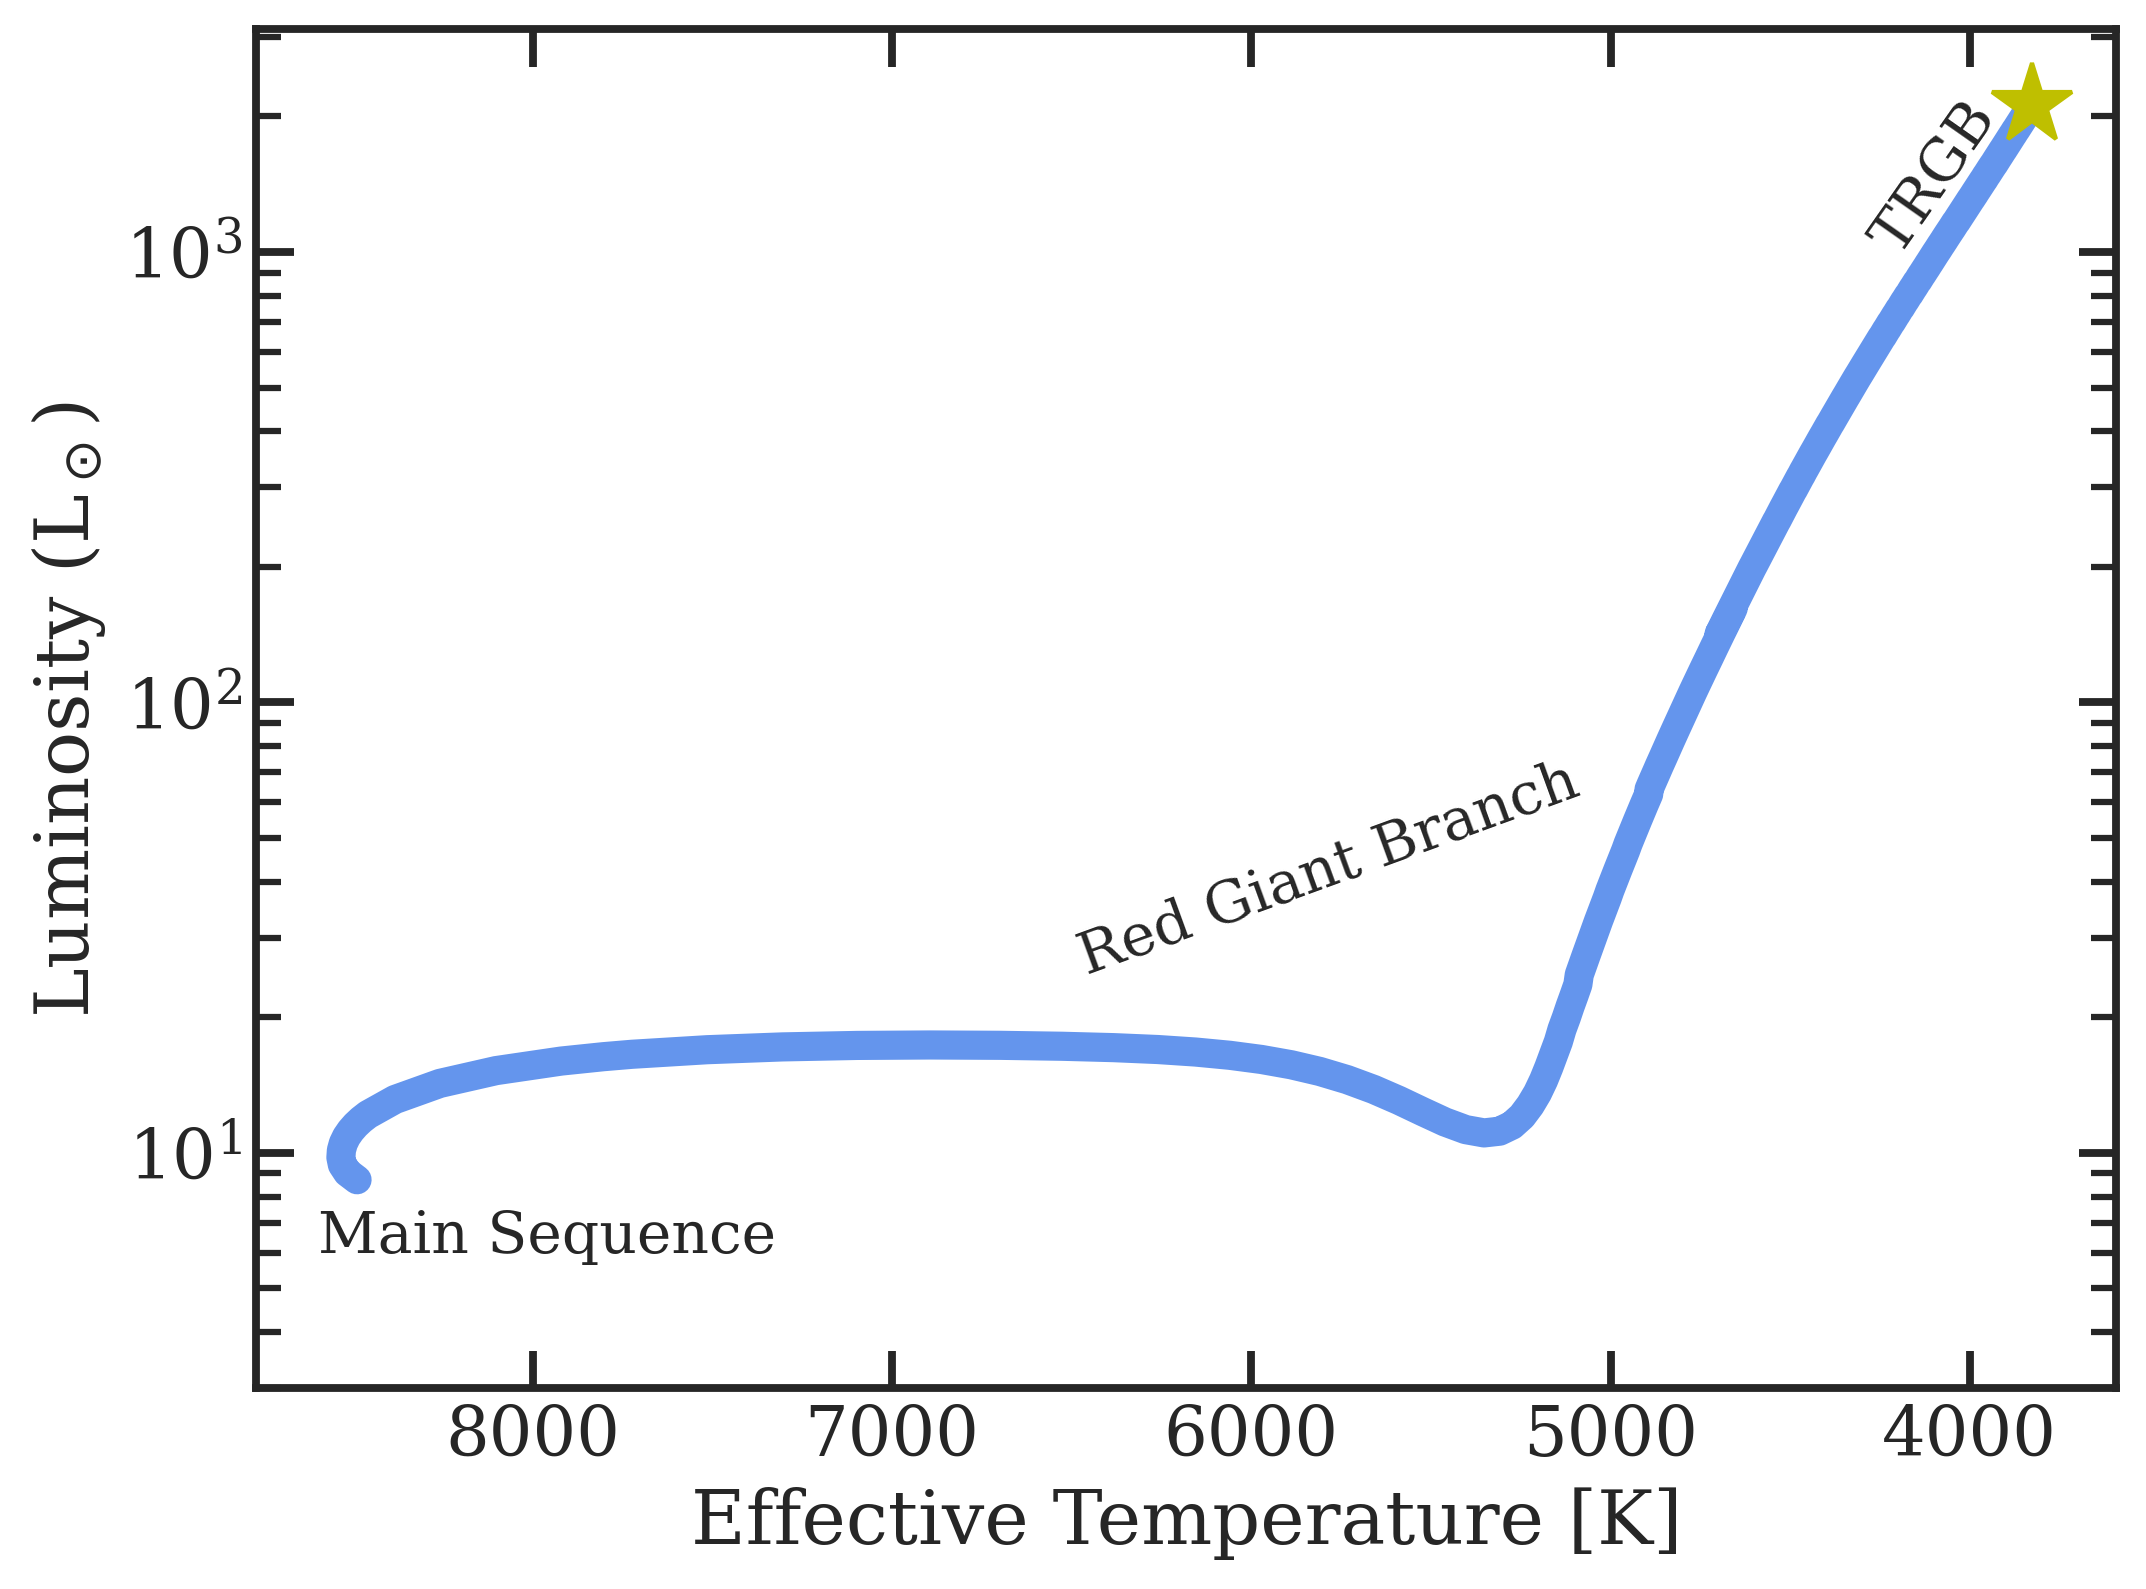

In [36]:
sb.set_style('white')

plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 300
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

fig, ax = plt.subplots(figsize=(8,6))
sm = data[-1]
m = MesaData(sm)
ax.plot(m.effective_T[idxs[-1]:], 10**m.log_L[idxs[-1]:], label=L, alpha=1, lw=7, color='cornflowerblue')
ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel(r'Luminosity (L$_\odot$)')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_ylim(3, max(10**m.log_L)+10**3)

ax.text( 8600, 6, 'Main Sequence', fontsize=14)
ax.text( 6500, 25, 'Red Giant Branch', fontsize=14, rotation=20)
ax.text( 4300, 1000, 'TRGB', fontsize=14, rotation=55)

ax.plot([min(m.effective_T[idxs[-1]:])], [max(10**m.log_L[idxs[-1]:])], '*', markersize=20, color='y')